In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil


# Data extraction

In [2]:
cardio = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/cardioActivities.csv')

In [3]:
cardio.head()

,Activity Id,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,Running,NaN,2.87,36:22,12:41,4.73,186.0,21,NaN,NaN,NaN,2024-12-10-180057.gpx
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,Running,NaN,7.97,1:16:59,9:40,6.21,559.0,41,NaN,NaN,NaN,2024-12-01-152310.gpx
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,Running,NaN,3.85,38:12,9:56,6.04,285.0,15,NaN,NaN,NaN,2024-11-17-160434.gpx
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,Running,NaN,7.86,1:10:45,9:00,6.67,568.0,42,NaN,NaN,NaN,2024-11-02-161558.gpx
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,Running,NaN,7.95,1:07:10,8:27,7.10,580.0,41,NaN,NaN,NaN,2024-10-26-171417.gpx


In [4]:
steps = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/steps.csv')
steps.head()

,Activity Id,Timestamp,Steps
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,8.0,3
1,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,11.0,9
2,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,16.0,12
3,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,19.0,2
4,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,21.0,2


In [5]:
cardio.shape, steps.shape

((361, 14), (540280, 3))

In [6]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               361 non-null    object 
 1   Date                      361 non-null    object 
 2   Type                      361 non-null    object 
 3   Route Name                0 non-null      float64
 4   Distance (km)             361 non-null    float64
 5   Duration                  361 non-null    object 
 6   Average Pace              361 non-null    object 
 7   Average Speed (km/h)      361 non-null    float64
 8   Calories Burned           361 non-null    float64
 9   Climb (m)                 361 non-null    int64  
 10  Average Heart Rate (bpm)  0 non-null      float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     0 non-null      float64
 13  GPX File                  360 non-null    object 
dtypes: float64

In [7]:
cardio.nunique()

Activity Id                 361
Date                        361
Type                          3
Route Name                    0
Distance (km)               216
Duration                    329
Average Pace                157
Average Speed (km/h)        170
Calories Burned             213
Climb (m)                   117
Average Heart Rate (bpm)      0
Friend's Tagged               0
Notes                         0
GPX File                    360
dtype: int64

In [8]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540280 entries, 0 to 540279
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Activity Id  540280 non-null  object 
 1    Timestamp   540280 non-null  float64
 2    Steps       540280 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.4+ MB


In [9]:
steps.nunique()

Activity Id     360
 Timestamp     5887
 Steps         9633
dtype: int64

There are 361 activities, one for each date.
Not too sure how steps is calculated because it seems like for each activity, there are multiple timestamps and steps. This may be "laps" when I ran/walked, stopped and then ran again. Maybe useful for a separate analysis.
There are no null values in the datasets.

In cardio, there are some columns that not useful because I didn't set them while running or didn't connect to a device (e.g Heart Rate). So these can be dropped.

In [10]:
columns_to_drop = ['Type', 'Route Name', 'Average Heart Rate (bpm)', "Friend's Tagged", 'Notes', 'GPX File']
cardio = cardio.drop(columns=columns_to_drop)
cardio.head()

,Activity Id,Date,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,2.87,36:22,12:41,4.73,186.0,21
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,7.97,1:16:59,9:40,6.21,559.0,41
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,3.85,38:12,9:56,6.04,285.0,15
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,7.86,1:10:45,9:00,6.67,568.0,42
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,7.95,1:07:10,8:27,7.10,580.0,41


The cardio dataframe has 361 rows and 9 columns. The main variables of note are:

1. **Activity Id** : A unique identifier for each activity.
2. **Date** : Date and time of the activity in date-time format.
3. **Distance (km)** : Distance covered during the activity, in km.
4. **Duration** : Duration of the activity in hours, minutes, seconds.
5. **Average Pace** : Pace of the activity, in minutes per km.
6. **Average Speed (km/h)** : Average speed in km/hr.
7. **Calories Burned** : No. of calories burned during the activity. I wouldn't take this as precise but it's a rough estimate.
8. **Climb (m)** : Total climb during the activity, in meters. 


# Exploration

Convert date to datetime and set to index for plotting.

In [11]:
cardio['Date'] = pd.to_datetime(cardio['Date'])
cardio.set_index('Date', inplace=True)

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-v0_8-notebook')

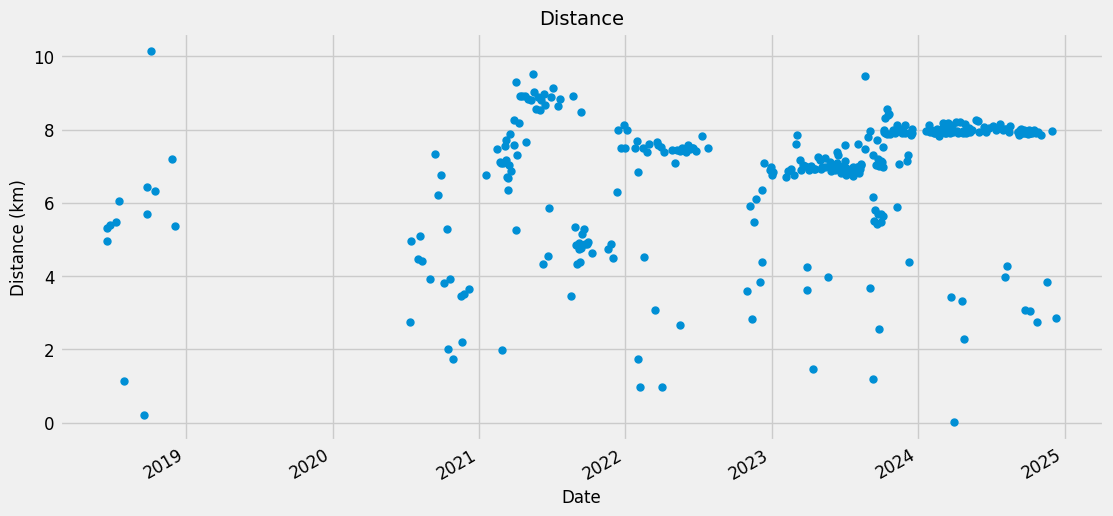

In [38]:
cardio['Distance (km)'].plot(figsize=(12, 6), fontsize=12, style='o', markersize=5)
plt.ylabel('Distance (km)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Distance', fontsize=14)
plt.show()

In [15]:
cardio.columns

Index(['Activity Id', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Calories Burned', 'Climb (m)'],
      dtype='object')

In [41]:
def duration_to_seconds(duration):
    parts = list(map(int, duration.split(':')))
    if len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    elif len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds

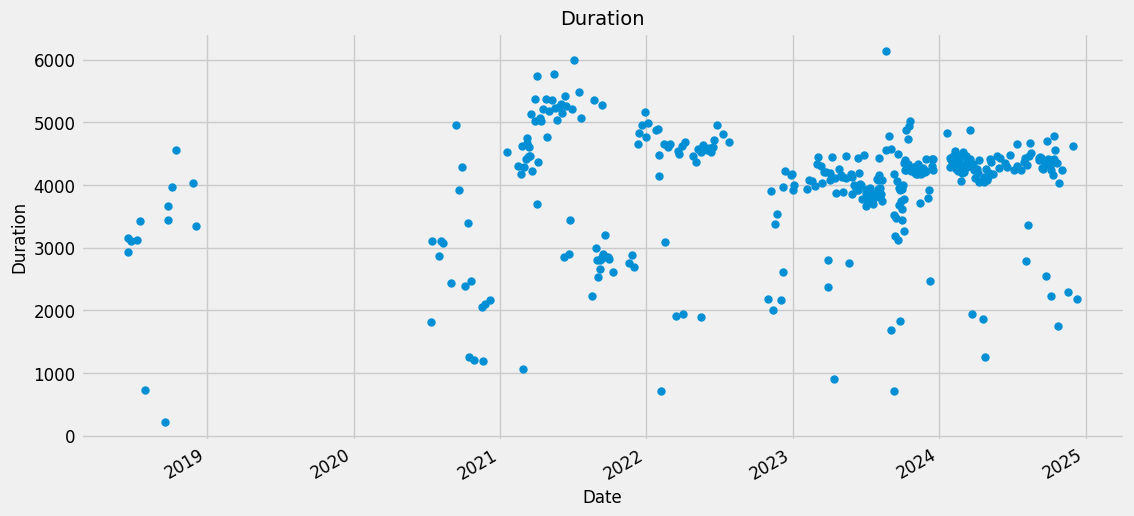

In [43]:
# Convert Duration to timedelta
cardio['Duration (seconds)'] = cardio['Duration'].apply(duration_to_seconds)

# Plot the Duration
cardio['Duration (seconds)'].plot(figsize=(12, 6), fontsize=12, style='o', markersize=5)
plt.ylabel('Duration', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Duration', fontsize=14)
plt.show()

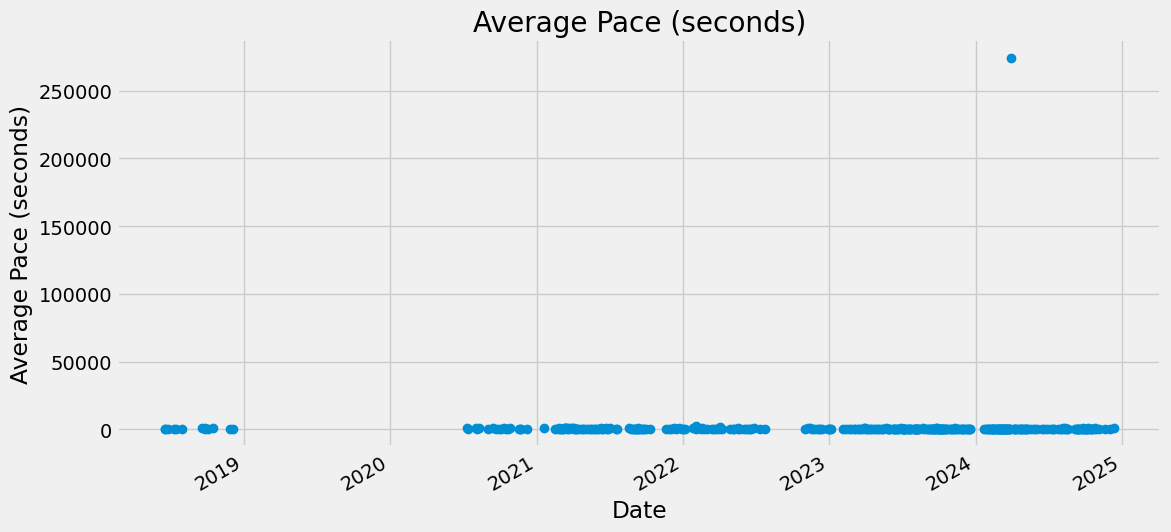

In [25]:
# Convert Average Pace from minutes:seconds to seconds
def pace_to_seconds(pace):
    minutes, seconds = map(int, pace.split(':'))
    return minutes * 60 + seconds

cardio['Average Pace (seconds)'] = cardio['Average Pace'].apply(pace_to_seconds)

# Plot the Average Pace in seconds
cardio['Average Pace (seconds)'].plot(title='Average Pace (seconds)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Average Pace (seconds)')
plt.show()

In [27]:
cardio.sort_values(by='Average Pace (seconds)', ascending=False).head()

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Time,Time_seconds,Average Pace (seconds)
Date,,,,,,,,,,
2024-03-29 17:43:04,6f5cd4d6-bf52-4f98-a662-baefba0c1aea,0.01,1:08:31,4568:53,0.01,107.0,0,17:43:04,63784,274133
2022-02-02 09:57:39,e5731e87-8cc5-48a6-93ba-1b3f56e98b0c,1.73,1:14:40,43:09,1.39,213.0,20,09:57:39,35859,2589
2022-04-02 22:07:47,7e2669b9-5496-4219-a7fc-edcc24fa36d3,0.98,32:18,32:50,1.83,129.0,0,22:07:47,79667,1970
2018-09-16 21:35:08,8c235ff6-0663-496f-9fcf-dc81113263a4,0.22,3:37,16:50,3.56,18.0,4,21:35:08,77708,1010
2024-09-23 18:45:14,1b1b9d0d-5385-4724-b42d-e972e7ac484f,3.08,42:38,13:52,4.33,221.0,20,18:45:14,67514,832


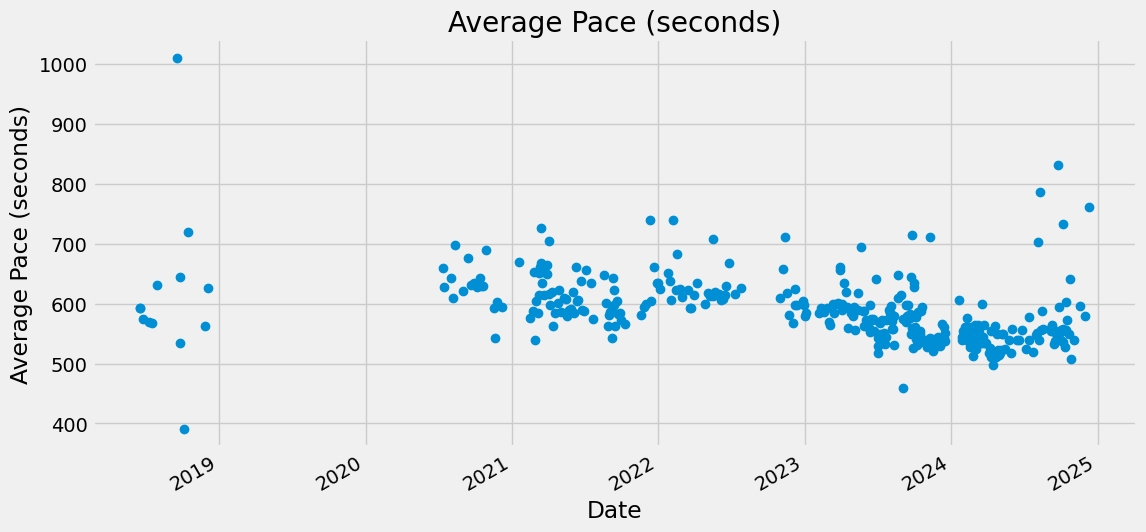

In [30]:
exclude_avg_pace = ['6f5cd4d6-bf52-4f98-a662-baefba0c1aea','e5731e87-8cc5-48a6-93ba-1b3f56e98b0c','7e2669b9-5496-4219-a7fc-edcc24fa36d3']
filtered_cardio_avg_pace = cardio[~cardio['Activity Id'].isin(exclude_avg_pace)]
# Plot the Average Pace in seconds
filtered_cardio_avg_pace['Average Pace (seconds)'].plot(title='Average Pace (seconds)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Average Pace (seconds)')
plt.show()

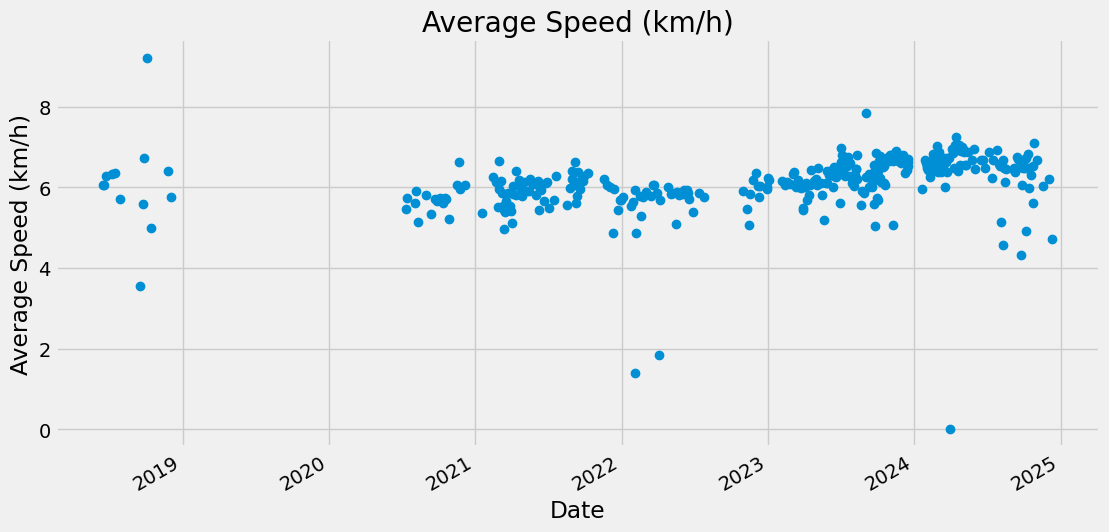

In [16]:
cardio['Average Speed (km/h)'].plot(title='Average Speed (km/h)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Average Speed (km/h)')
plt.show()

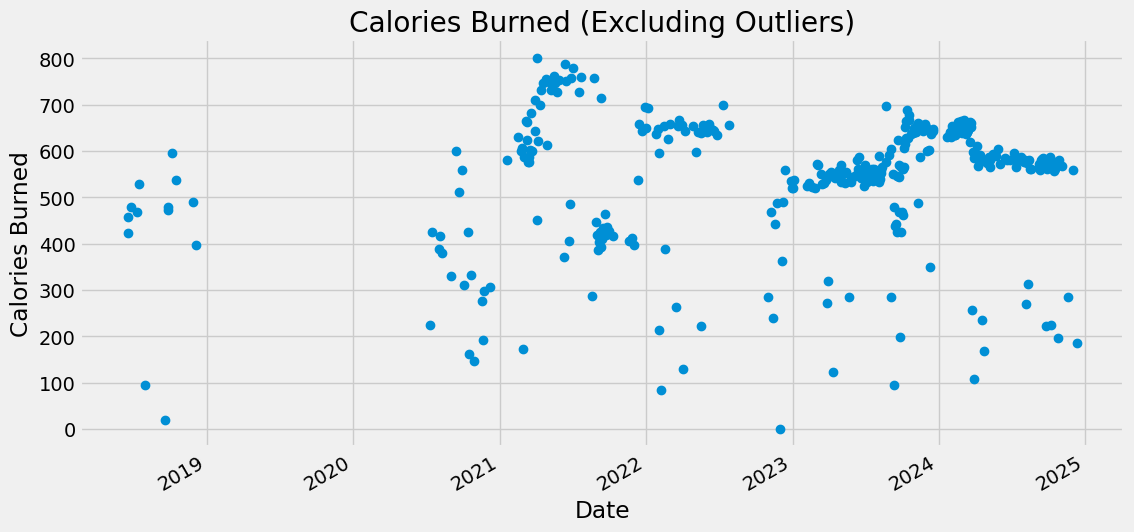

In [17]:
# Define the activity ids to exclude
exclude_ids = ['0a4cc07b-d889-4b30-82b8-99b1c19cac7f', '40befe8e-a1f1-42ae-aa44-5ca3384b31b3']

# Filter the dataframe to exclude the specified activity ids
filtered_cardio = cardio[~cardio['Activity Id'].isin(exclude_ids)]

# Plot the filtered data
filtered_cardio['Calories Burned'].plot(title='Calories Burned (Excluding Outliers)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.show()

In [18]:
cardio.sort_values(by='Calories Burned', ascending=False).head(20)

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
Date,,,,,,,
2021-06-04 23:48:10,0a4cc07b-d889-4b30-82b8-99b1c19cac7f,8.81,1:25:47,9:44,6.16,857607276.0,231
2021-05-31 22:05:01,40befe8e-a1f1-42ae-aa44-5ca3384b31b3,8.55,1:28:13,10:19,5.82,34130321.0,200
2021-04-03 22:24:25,1c420a15-6f4f-4b7c-b1fb-fcf86b7b6bed,9.31,1:35:36,10:16,5.84,801.0,227
2021-06-11 22:35:30,d89f68f6-607e-42cf-87a2-c3c5eaf50792,8.98,1:30:22,10:04,5.96,788.0,223
2021-07-02 23:20:58,54e7f49a-4e7a-4bc8-bb77-af621bc1f5a3,9.13,1:39:49,10:56,5.49,779.0,220
2021-05-14 23:13:47,7a69b427-9a62-415d-9398-e47843b73db8,9.51,1:36:17,10:08,5.92,762.0,203
2021-07-20 22:15:46,e01a6f61-5e29-4f41-a921-c98e7630d25d,8.83,1:24:31,9:34,6.27,759.0,232
2021-08-23 21:26:14,9d18936c-dc19-440f-ad8b-daa859f4cb9b,8.91,1:29:15,10:01,5.99,758.0,229
2021-06-27 22:45:59,40d4e855-19b3-4988-856b-1e82049a7f91,8.88,1:26:49,9:47,6.13,757.0,219


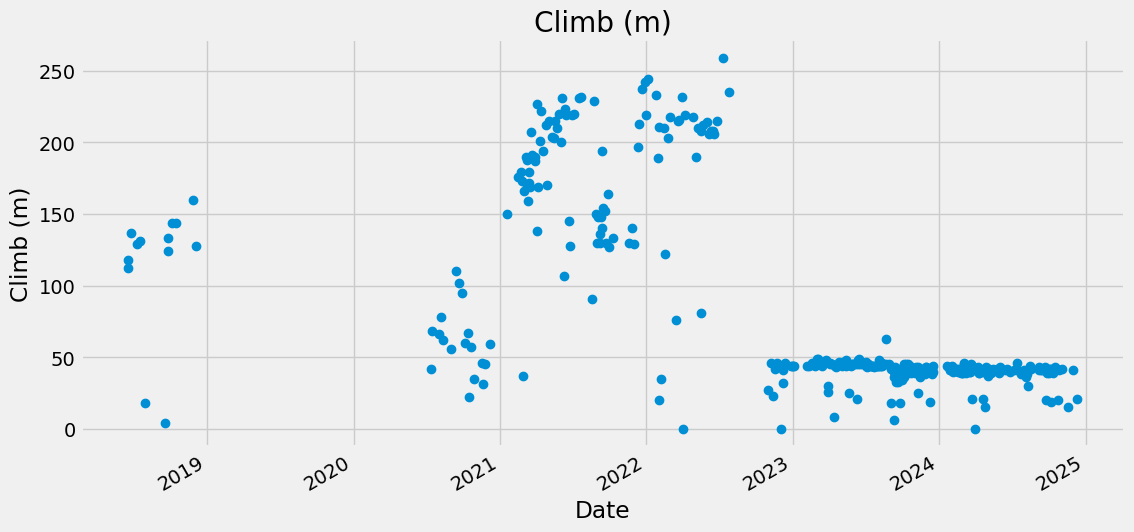

In [19]:
cardio['Climb (m)'].plot(title='Climb (m)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Climb (m)')
plt.show()

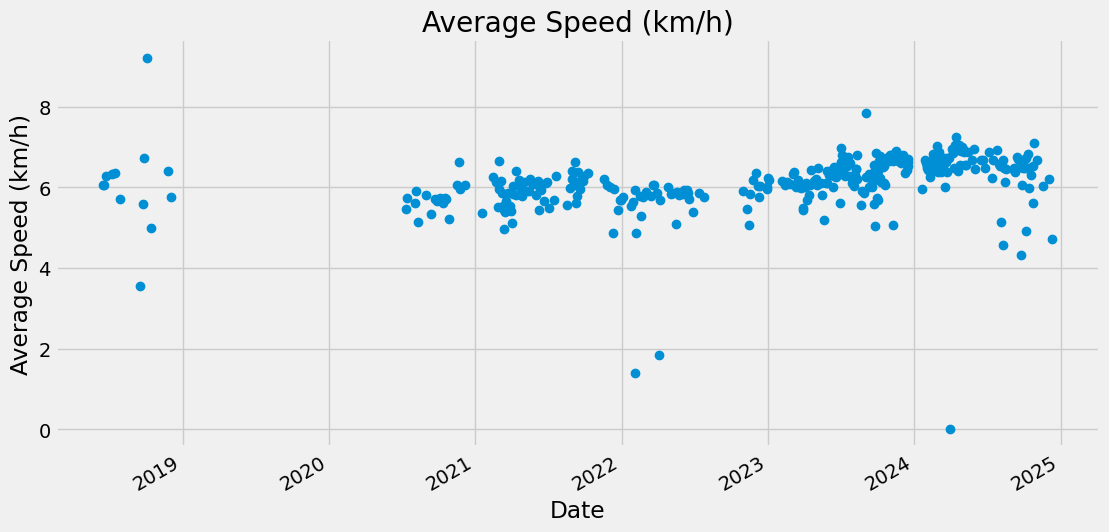

In [20]:
cardio['Average Speed (km/h)'].plot(title='Average Speed (km/h)', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Average Speed (km/h)')
plt.show()

In [21]:
cardio['Time'] = cardio.index.time
cardio['Time_seconds'] = cardio['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


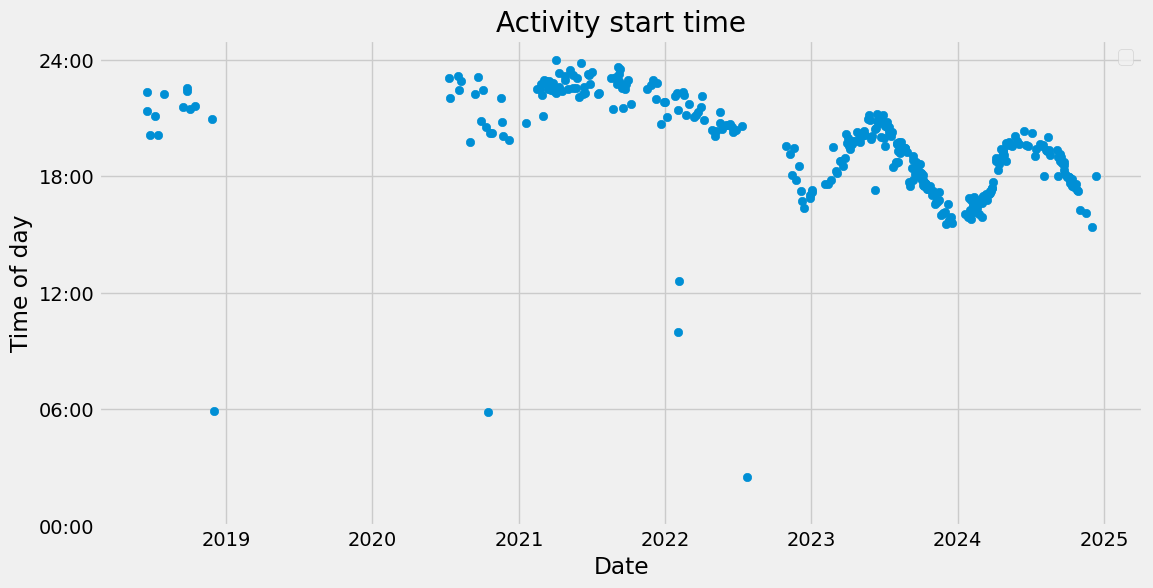

In [22]:

plt.figure(figsize=(12, 6))
plt.scatter(cardio.index, cardio['Time_seconds'])
plt.yticks(range(0, 25 * 3600, 6 * 3600), [f"{i:02}:00" for i in range(0, 25, 6)])

plt.xlabel("Date")
plt.ylabel("Time of day")
plt.title("Activity start time")
plt.legend()
plt.grid(True)
plt.show()